# Projet Machine-Learning Antoine Théologien & Celian Vasson
## SGD et Optim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim_old(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Époque {epoch}, Perte : {losses[-1]:.4f}")

    return losses, network

Époque 0, Perte : 0.2659
Époque 50, Perte : 0.0005
Époque 100, Perte : 0.0001
Époque 150, Perte : 0.0001
Époque 200, Perte : 0.0001
Époque 250, Perte : 0.0000
Époque 300, Perte : 0.0000
Époque 350, Perte : 0.0000
Époque 400, Perte : 0.0000
Époque 450, Perte : 0.0000
Test Loss (Data type 0): 0.0000
Époque 0, Perte : 0.4896
Époque 50, Perte : 0.2547
Époque 100, Perte : 0.2387
Époque 150, Perte : 0.0243
Époque 200, Perte : 0.0141
Époque 250, Perte : 0.0123
Époque 300, Perte : 0.0100
Époque 350, Perte : 0.0105
Époque 400, Perte : 0.0082
Époque 450, Perte : 0.0079
Test Loss (Data type 1): 0.0067
Époque 0, Perte : 0.3639
Époque 50, Perte : 0.2735
Époque 100, Perte : 0.2391
Époque 150, Perte : 0.2316
Époque 200, Perte : 0.2267
Époque 250, Perte : 0.2224
Époque 300, Perte : 0.2208
Époque 350, Perte : 0.2175
Époque 400, Perte : 0.2148
Époque 450, Perte : 0.2126
Test Loss (Data type 2): 0.2046


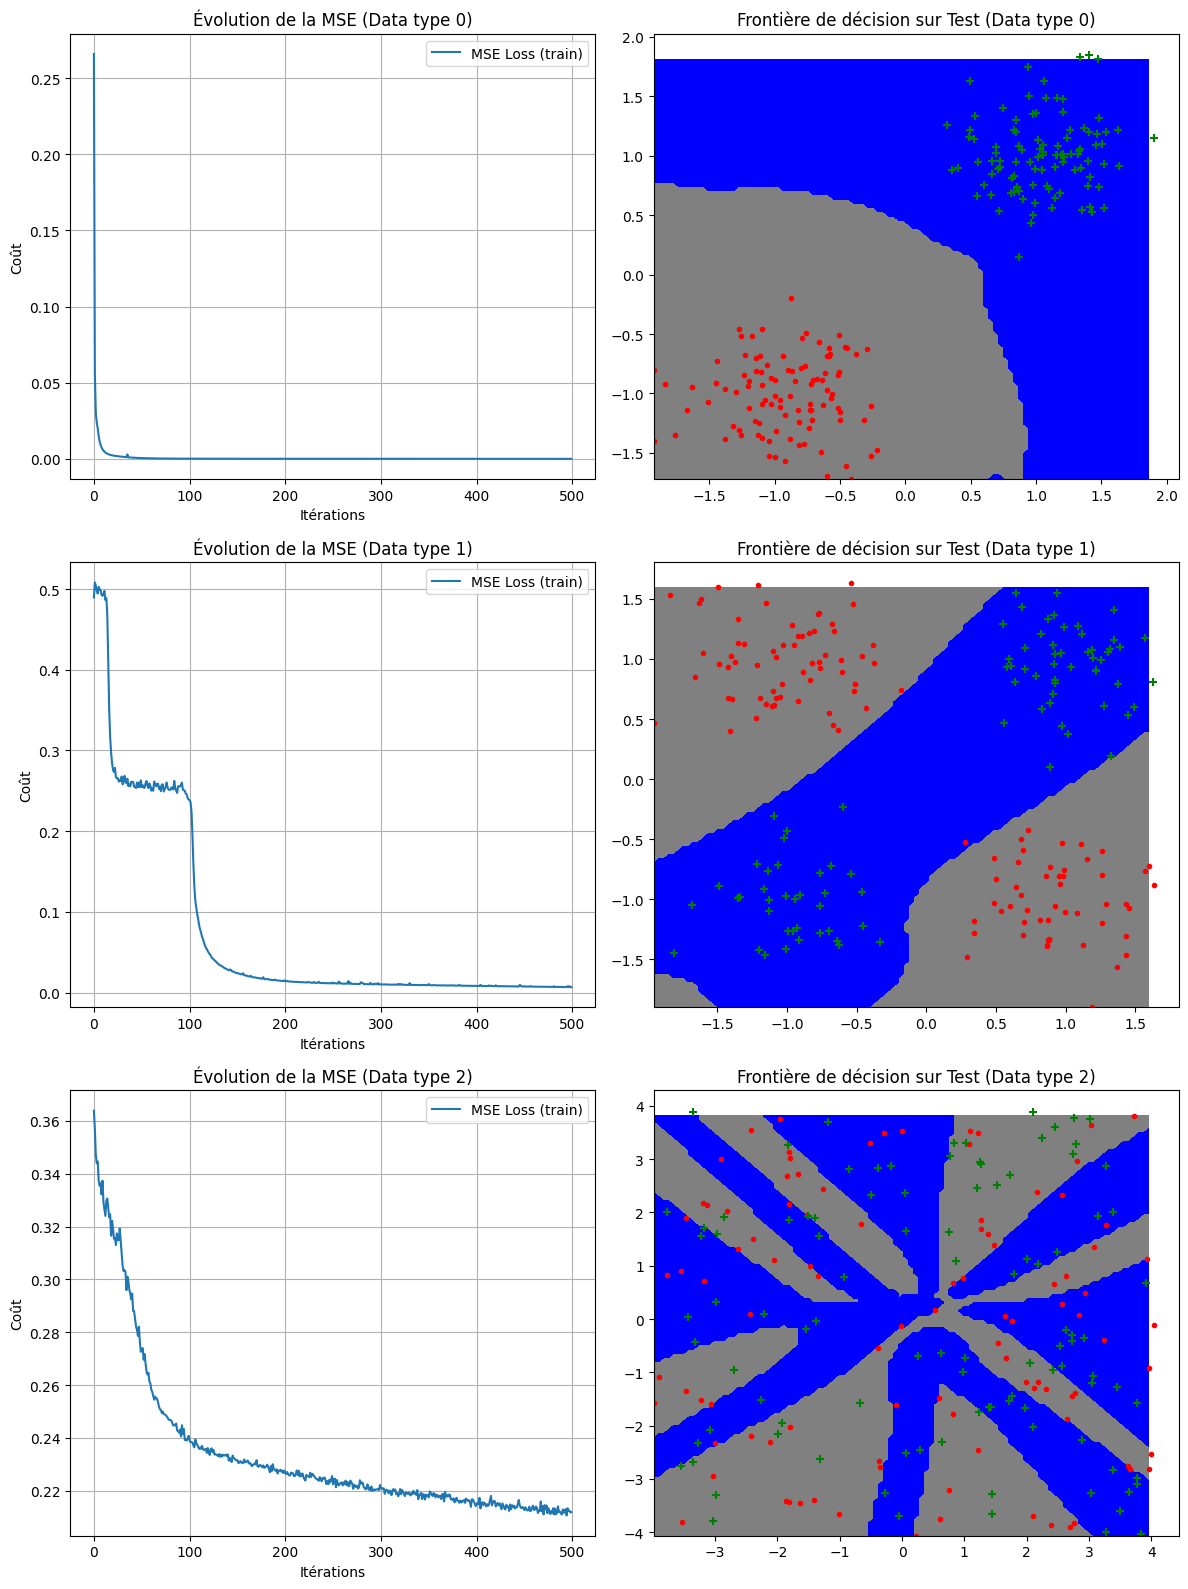

Époque 0, Perte : 0.3761
Époque 50, Perte : 0.0298
Époque 100, Perte : 0.0175
Époque 150, Perte : 0.0124
Époque 200, Perte : 0.0092
Époque 250, Perte : 0.0071
Époque 300, Perte : 0.0057
Époque 350, Perte : 0.0047
Époque 400, Perte : 0.0040
Époque 450, Perte : 0.0034
Test Loss (Data type 0): 0.0030
Époque 0, Perte : 0.3861
Époque 50, Perte : 0.1808
Époque 100, Perte : 0.1453
Époque 150, Perte : 0.1279
Époque 200, Perte : 0.1210
Époque 250, Perte : 0.1175
Époque 300, Perte : 0.1155
Époque 350, Perte : 0.1145
Époque 400, Perte : 0.1135
Époque 450, Perte : 0.1134
Test Loss (Data type 1): 0.1036
Époque 0, Perte : 0.5219
Époque 50, Perte : 0.0254
Époque 100, Perte : 0.0203
Époque 150, Perte : 0.0176
Époque 200, Perte : 0.0169
Époque 250, Perte : 0.0165
Époque 300, Perte : 0.0162
Époque 350, Perte : 0.0161
Époque 400, Perte : 0.0159
Époque 450, Perte : 0.0157
Test Loss (Data type 2): 0.0179


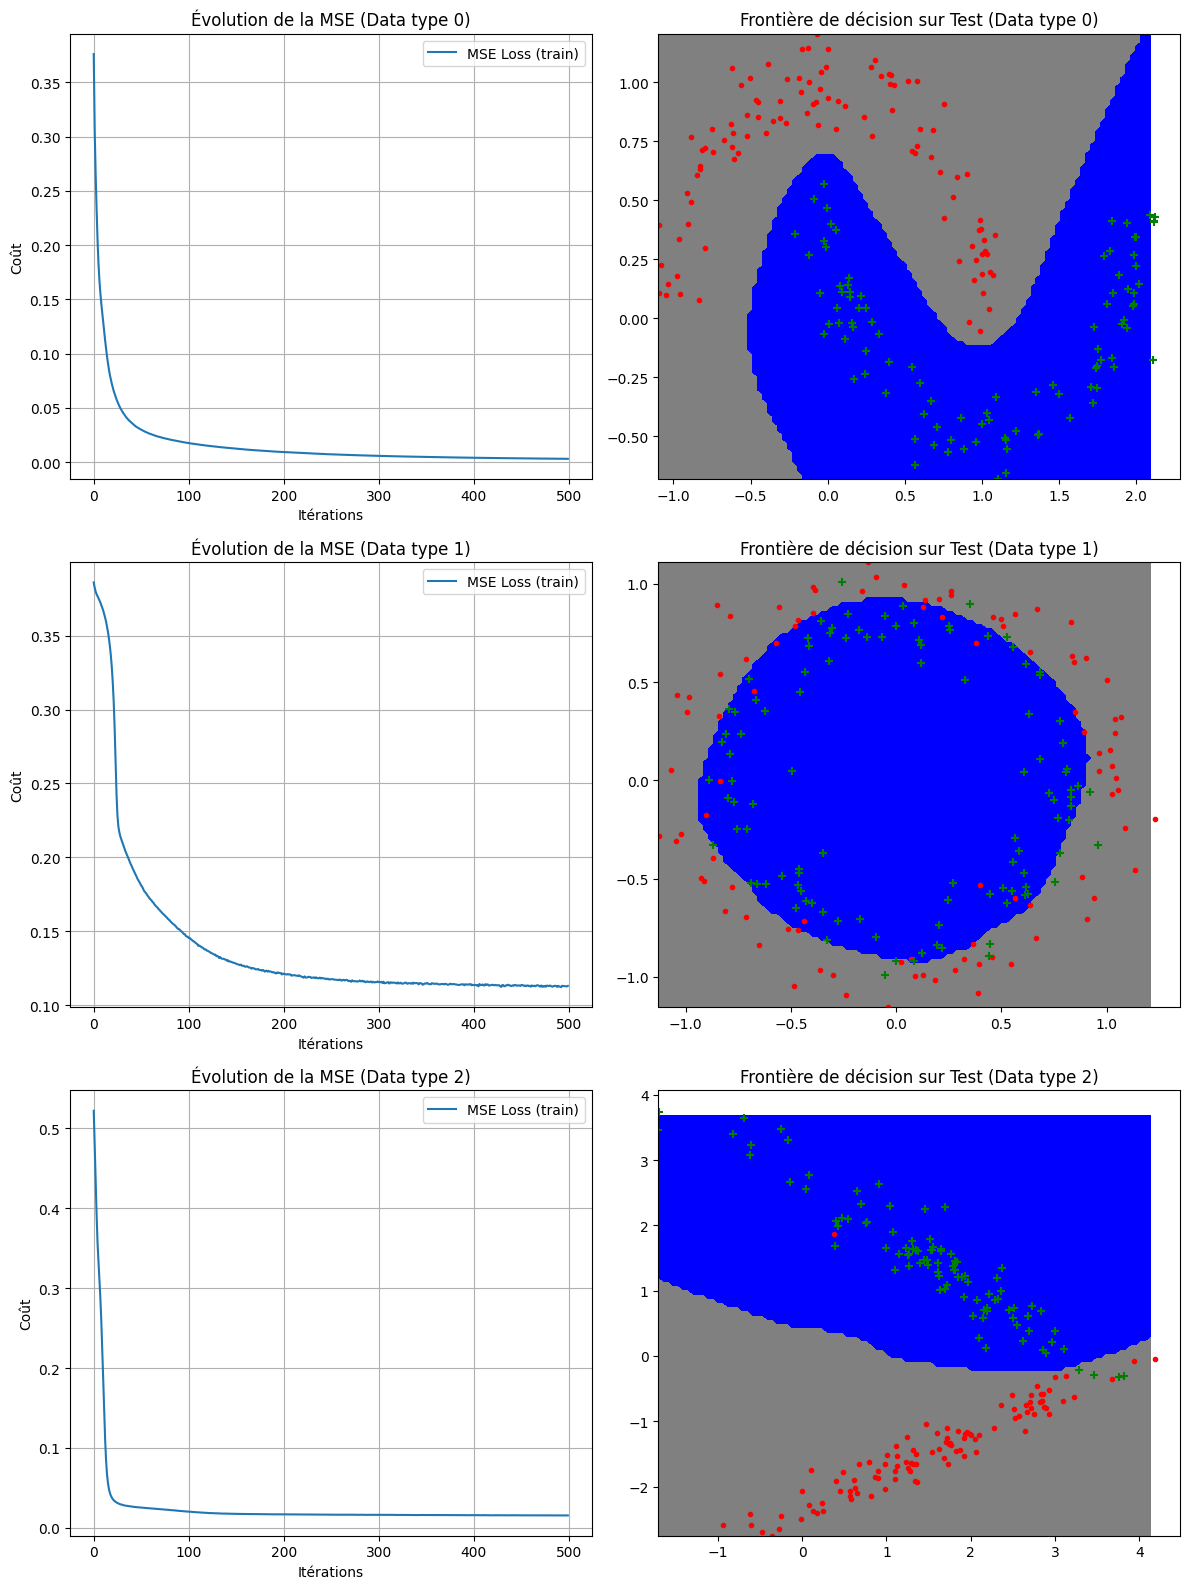

In [2]:
from sklearn.model_selection import train_test_split
import os
output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(12, 16))

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel_old(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 20),
        TanH(),
        Linear(20, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, datax, datay, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.subplot(3, 2, 2 * i + 1) 
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)  
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


plt.tight_layout()

output_path = os.path.join(output_dir, "optim1.png")
plt.savefig(output_path, dpi=300)

plt.show()
plt.figure(figsize=(12, 16))

for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)


    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel_old(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 20),
        TanH(),
        Linear(20, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, X_train, y_train, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.subplot(3, 2, 2 * i + 1) 
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)  
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


plt.tight_layout()

output_path = os.path.join(output_dir, "optim2.png")
plt.savefig(output_path, dpi=300)

plt.show()

